# r/AITMA - Am I the Masshole? 

In [1]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# look at Seaborn datasets

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# load car_crashes dataset

df = sns.load_dataset('car_crashes')
df.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


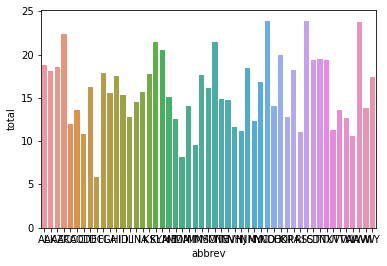

In [5]:
# bar chart of total crashes per billion miles by state, hue for speeding

ax = sns.barplot(x = 'abbrev', y = 'total', data = df)
plt.show()

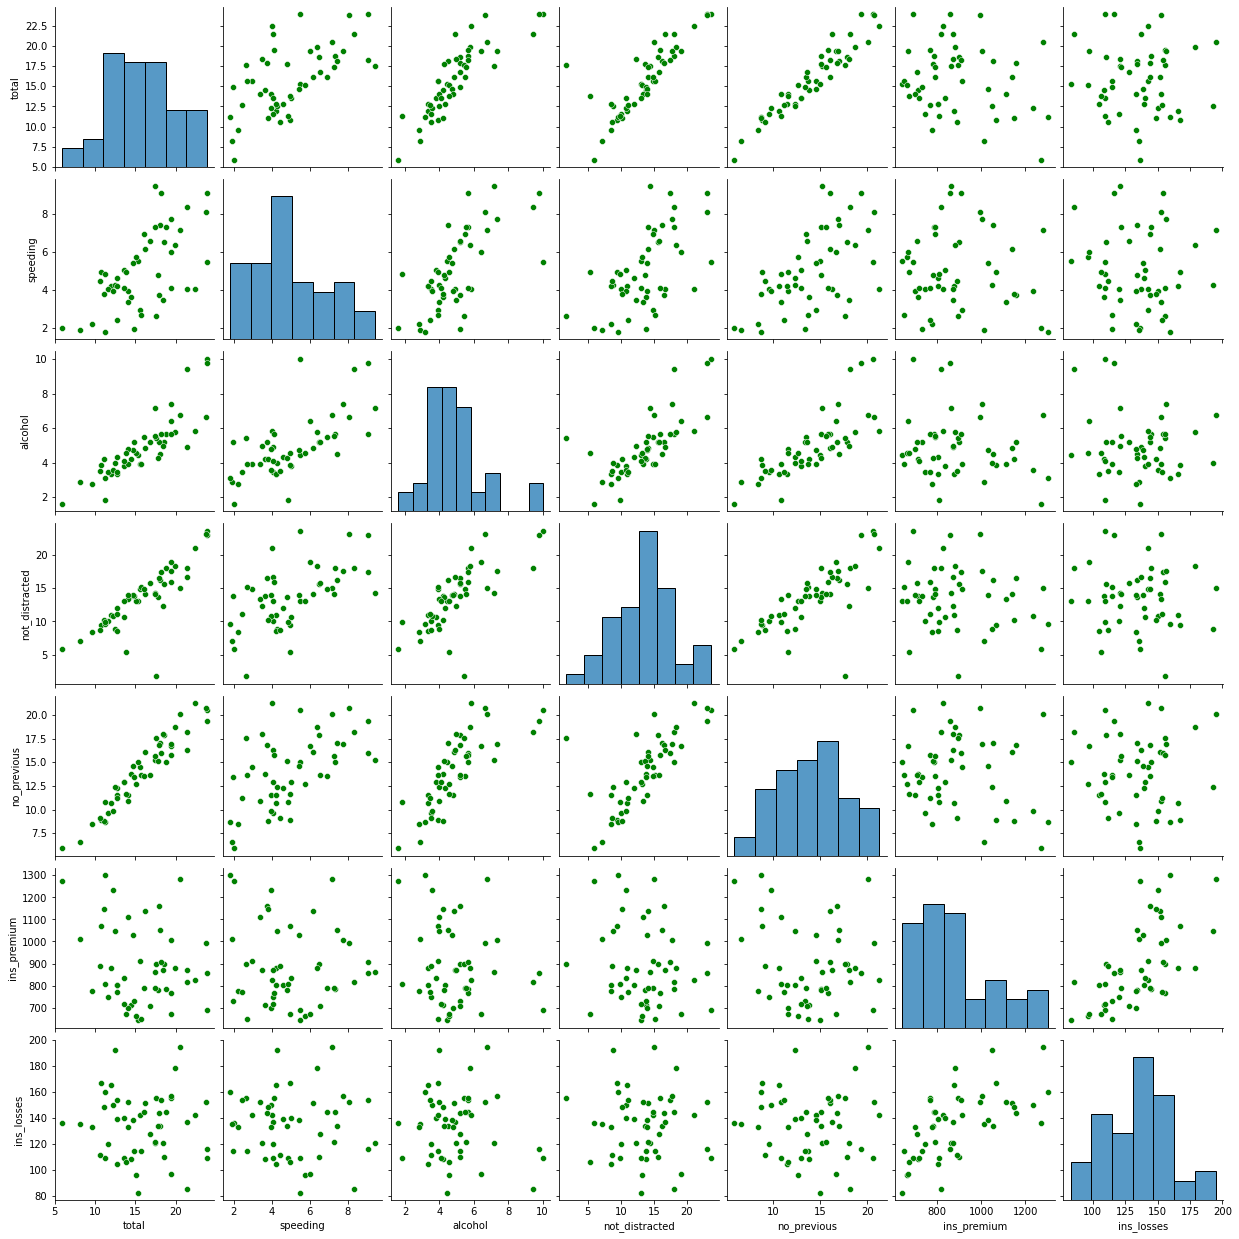

In [6]:
# pairplot

sns.pairplot(df, plot_kws = {"color": "green"})

In [9]:
# 50 states correlation matrix

us_corr_dataframe = df[['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium']].corr()
us_corr_dataframe

,speeding,alcohol,not_distracted,no_previous,ins_premium
speeding,1.000000,0.669719,0.588010,0.571976,-0.077675
alcohol,0.669719,1.000000,0.732816,0.783520,-0.170612
not_distracted,0.588010,0.732816,1.000000,0.747307,-0.174856
no_previous,0.571976,0.783520,0.747307,1.000000,-0.156895
ins_premium,-0.077675,-0.170612,-0.174856,-0.156895,1.000000


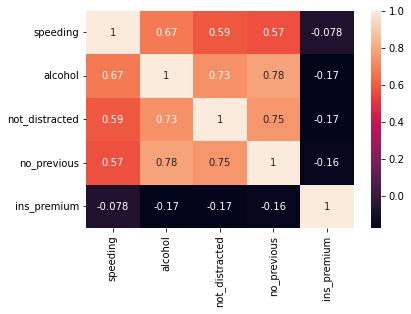

In [10]:
# 50 states heat map

us_hm = sns.heatmap(us_corr_dataframe, annot = True)

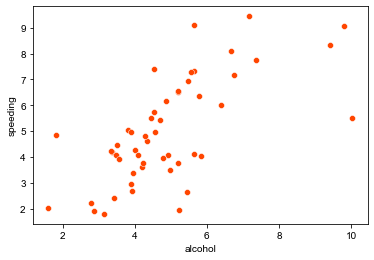

In [11]:
# scatter plot for speeding and alcohol

ax = sns.scatterplot(x = 'alcohol', y = 'speeding', data = df, color = 'orangered', marker = "o")
sns.set(rc={'figure.figsize': (5, 3)})

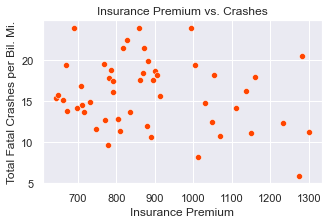

In [12]:
# scatter plot for ins_premium and total

ax = sns.scatterplot(x = 'ins_premium', y = 'total', data = df, color = 'orangered', marker = "o")
sns.set(rc={'figure.figsize': (5, 5)})
sns.set_style("darkgrid")
plt.title('Insurance Premium vs. Crashes')
plt.xlabel('Insurance Premium')
plt.ylabel('Total Fatal Crashes per Bil. Mi.')
plt.show()

In [13]:
# Northeast: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont, New Jersey, New York, and Pennsylvania)

ne_df = df.loc[(df.abbrev == "CT") | (df.abbrev == "ME") | (df.abbrev == "MA") | (df.abbrev == "NH") | (df.abbrev == "RI") | (df.abbrev == "VT") | (df.abbrev == "NJ") | (df.abbrev == "NY") | (df.abbrev == "PA")]
ne_df.sort_values(by=['total'], ascending=False)
ne_df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
19,15.1,5.738,4.530,13.137,12.684,661.88,96.57,ME
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA
29,11.6,4.060,3.480,10.092,9.628,746.54,120.21,NH
30,11.2,1.792,3.136,9.632,8.736,1301.52,159.85,NJ
32,12.3,3.936,3.567,10.824,9.840,1234.31,150.01,NY
38,18.2,9.100,5.642,17.472,16.016,905.99,153.86,PA
39,11.1,3.774,4.218,10.212,8.769,1148.99,148.58,RI
45,13.6,4.080,4.080,13.056,12.920,716.20,109.61,VT


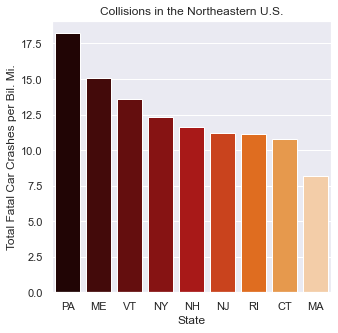

In [14]:
# bar chart for northeast (new england and mid-atlantic)
# call attention to MA and NY

ax = sns.barplot(x = 'abbrev', y = 'total', data = ne_df, palette = 'gist_heat', order=ne_df.sort_values('total',ascending = False).abbrev)
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize': (3, 3)})
plt.title('Collisions in the Northeastern U.S.')
plt.xlabel('State')
plt.ylabel('Total Fatal Car Crashes per Bil. Mi.')
plt.show()

In [15]:
# ny and ma only df

nyma_df = df.loc[(df.abbrev == "NY") | (df.abbrev == "MA")]
nyma_df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
21,8.2,1.886,2.870,7.134,6.56,1011.14,135.63,MA
32,12.3,3.936,3.567,10.824,9.84,1234.31,150.01,NY


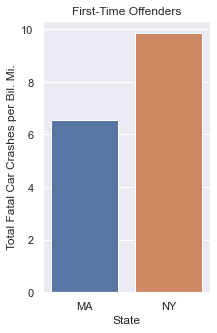

In [16]:
# ny and ma first-time offenders

sns.set(rc={'figure.figsize': (3, 5)})
ax = sns.barplot(x = 'abbrev', y = 'no_previous', data = nyma_df)
plt.title('First-Time Offenders')
plt.xlabel('State')
plt.ylabel('Total Fatal Car Crashes per Bil. Mi.')
plt.show()

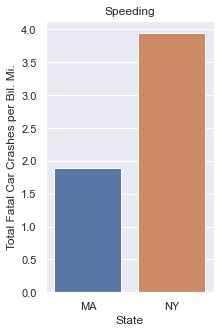

In [17]:
# ny and ma speeding

sns.set(rc={'figure.figsize': (3, 5)})
ax = sns.barplot(x = 'abbrev', y = 'speeding', data = nyma_df)
plt.title('Speeding')
plt.xlabel('State')
plt.ylabel('Total Fatal Car Crashes per Bil. Mi.')
plt.show()

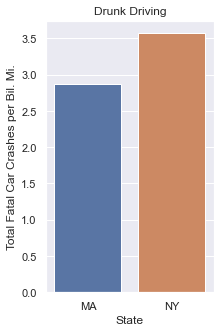

In [18]:
# ny and ma alcohol

sns.set(rc={'figure.figsize': (3, 5)})
ax = sns.barplot(x = 'abbrev', y = 'alcohol', data = nyma_df)
plt.title('Drunk Driving')
plt.xlabel('State')
plt.ylabel('Total Fatal Car Crashes per Bil. Mi.')
plt.show()

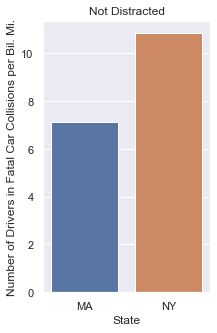

In [19]:
# ny and ma not distracted

sns.set(rc={'figure.figsize': (3, 5)})
ax = sns.barplot(x = 'abbrev', y = 'not_distracted', data = nyma_df)
plt.title('Not Distracted')
plt.xlabel('State')
plt.ylabel('Number of Drivers in Fatal Car Collisions per Bil. Mi.')
plt.show()

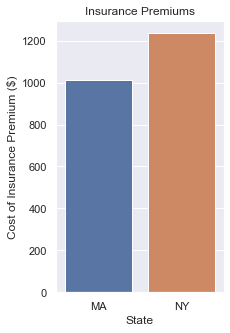

In [20]:
# ny and ma premiums

sns.set(rc={'figure.figsize': (3, 5)})
ax = sns.barplot(x = 'abbrev', y = 'ins_premium', data = nyma_df)
plt.title('Insurance Premiums')
plt.xlabel('State')
plt.ylabel('Cost of Insurance Premium ($)')
plt.show()